In [3]:
import squidpy
import pylab as pl
%matplotlib inline
instruments = squidpy.get_instruments()

In [4]:
mock1 = instruments.mock1
mock2 = instruments.mock2
instruments

mock1,"['time', 'wave', 'voltage']"
mock2,"['time', 'wave', 'voltage']"


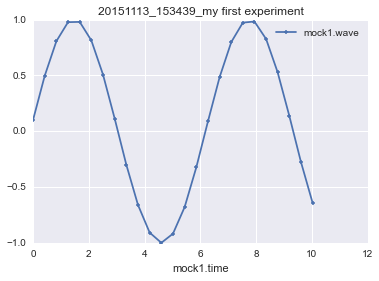

In [3]:
title = 'my first experiment'
test = squidpy.Experiment(title, instruments)
test.sweep('mock1.time')[0:10:.4]
test.measure()
test.run()

test.plot('mock1.time','mock1.wave',style='.-')
while test.running:
    test.update_plot()

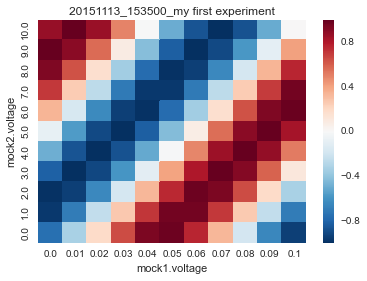

In [4]:
title = 'my first experiment'
test = squidpy.Experiment(title, instruments)

test.sweep('mock2.voltage')[0:10:1]
test.sweep('mock1.voltage')[0:.1:.01]
test.measure()

instruments.mock1.time = 0
test.run()

test.pcolor('mock1.voltage','mock2.voltage','mock2.wave')
while test.running:
    test.update_plot()

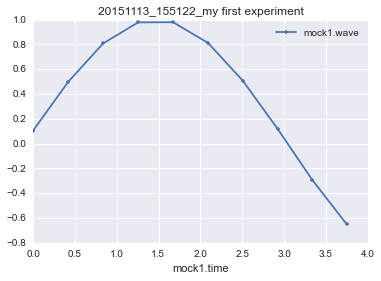

In [14]:
title = 'my first experiment'
test = squidpy.Experiment(title, instruments)

test.sweep('mock1.time')[0:4:.4]
test.do('print(\'hello world\')')
test.measure()
test.run()

title = 'my first experiment1'
test.plot('mock1.time','mock1.wave',style='.-')

while test.running:
    test.update_plot()

In [5]:
instruments.s.close()

In [13]:
instruments.s.lock = 

AttributeError: 'socket' object has no attribute 'lock'